# 测试MetroDraw文件夹下的Draw.py

## 测试Draw_map类

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from MeteoPy import Draw_map
from MeteoPy import adjust_sub_axes

In [14]:
# # 读取绘图数据
# # 获取近30年海平面气压1991-2020
test_data1_ = xr.open_dataarray('../TestData/slp.mon.mean.nc')
test_data1 = test_data1_.loc['1991-01-01':'2020-12-01']  # 索引时间
lon, lat = test_data1['lon'], test_data1['lat']  # 获取经纬度
test_data1 = np.array(test_data1).reshape(test_data1.shape[0] // 12, 12, 
                                          test_data1.shape[1], test_data1.shape[2])  # 重铸维度，方便月平均
test_data1 = np.mean(test_data1, axis=1)  # 月平均

# # 获取近30年Nino3.4指数1990-2020
test_data2 = pd.read_csv('../TestData/nina34.txt', sep='\s+', header=None, skiprows=1, skipfooter=3,
                         names=['年'] + [str(i) + '月' for i in range(1, 13)], index_col=['年'], 
                         engine='python')
test_data2 = test_data2.loc[1991:2020]
test_data2 = test_data2.mean(axis=1)  # 月平均

# # slp与Nino3.4指数做相关
r, p = np.zeros((test_data1.shape[1], test_data1.shape[2])), np.zeros((test_data1.shape[1], test_data1.shape[2]))
for i in range(test_data1.shape[1]):
    for j in range(test_data1.shape[2]):
        r[i, j], p[i, j] = pearsonr(test_data2, test_data1[:, i, j])

### 测试填色图、打点图，以及南海小地图

cnmap={'country': '中华人民共和国', 'province': None, 'city': None, 'district': None, 'level': None, 'inline': True, 'linewidth': 0.8}
type={'contourf': {'levels': array([-1.0000000e+00, -9.5000000e-01, -9.0000000e-01, -8.5000000e-01,
       -8.0000000e-01, -7.5000000e-01, -7.0000000e-01, -6.5000000e-01,
       -6.0000000e-01, -5.5000000e-01, -5.0000000e-01, -4.5000000e-01,
       -4.0000000e-01, -3.5000000e-01, -3.0000000e-01, -2.5000000e-01,
       -2.0000000e-01, -1.5000000e-01, -1.0000000e-01, -5.0000000e-02,
        8.8817842e-16,  5.0000000e-02,  1.0000000e-01,  1.5000000e-01,
        2.0000000e-01,  2.5000000e-01,  3.0000000e-01,  3.5000000e-01,
        4.0000000e-01,  4.5000000e-01,  5.0000000e-01,  5.5000000e-01,
        6.0000000e-01,  6.5000000e-01,  7.0000000e-01,  7.5000000e-01,
        8.0000000e-01,  8.5000000e-01,  9.0000000e-01,  9.5000000e-01,
        1.0000000e+00]), 'cmap': 'RdBu', 'cbar': [[0.82, 0.2, 0.015, 0.6], 'vertical', None], 'hatches': None}, '南海': {'shrink': 0.15

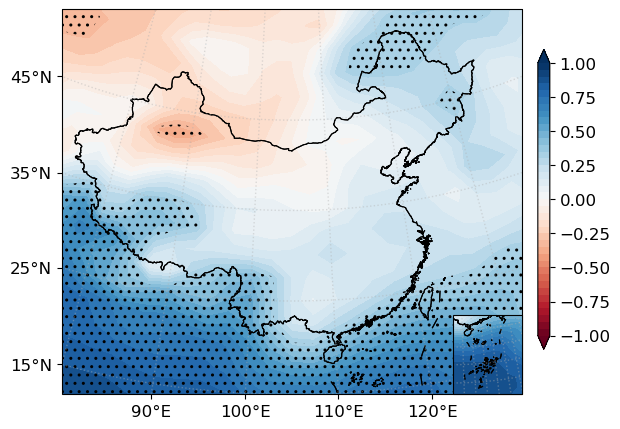

In [15]:
map_proj = ccrs.LambertConformal(
    central_longitude=105, standard_parallels=(25, 47)
)
# # 创建空白画布
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=map_proj)
# # 创建绘图实例
draw = Draw_map()
draw.comunity_maps(ax, extent=[80, 130, 15, 55], xticks=np.arange(80, 130.1, 10),
                   yticks=np.arange(5, 45.1, 10), cnmap={'country':'中华人民共和国'})
# 相关系数r填色图
draw.draw_contour_f(fig, ax, lon, lat, r, type={'contourf':{'levels':np.arange(-1, 1.01, 0.05), 'cmap':'RdBu',
                                                            'cbar':[[0.82, 0.2, 0.015, 0.6], 'vertical', None]}, 
                                                '南海':{'shrink':0.15}})
# p值打点图
draw.draw_contour_f(fig, ax, lon, lat, p, type={'contourf':{'levels':[0, 0.1, 1], 'hatches':['..', None]}})

## 测试WPS_domain类

In [16]:
import f90nml
from MeteoPy import WPS_domain

In [17]:
# # 查看namelist.wps内容
f90nml.read('../TestData/namelist.wps')

Namelist([('share',
           Namelist([('wrf_core', 'ARW'),
                     ('max_dom', 2),
                     ('start_date',
                      ['2017-07-20_00:00:00', '2017-07-20_00:00:00']),
                     ('end_date',
                      ['2017-07-25_00:00:00', '2017-07-25_00:00:00']),
                     ('interval_seconds', 21600),
                     ('io_form_geogrid', 2)])),
          ('geogrid',
           Namelist([('parent_id', [1, 1, 2]),
                     ('parent_grid_ratio', [1, 3, 3]),
                     ('i_parent_start', [1, 55, 20]),
                     ('j_parent_start', [1, 35, 20]),
                     ('e_we', [113, 82, 61]),
                     ('e_sn', [136, 82, 61]),
                     ('geog_data_res', ['modis_lakes', 'modis_lakes']),
                     ('dx', 9000),
                     ('dy', 9000),
                     ('map_proj', 'lambert'),
                     ('ref_lat', 33.0),
                     ('ref_lon', 119.0)

cnmap={'level': '省', 'country': None, 'province': None, 'city': None, 'district': None, 'inline': True, 'linewidth': 0.8}


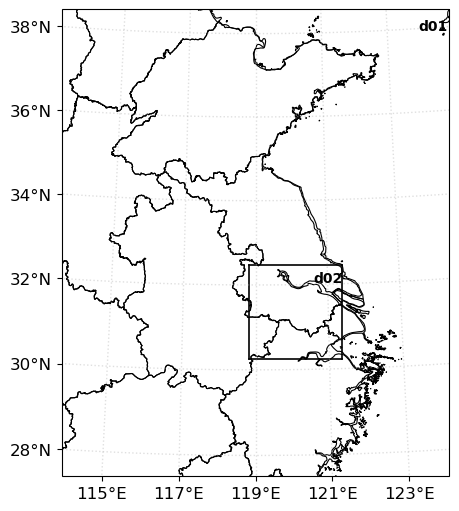

In [18]:
import numpy as np
# # 测试
WPS_domain('../TestData/namelist.wps', xticks=np.arange(115, 124, 2), yticks=np.arange(28, 39, 2))

## 测试Landuse_geo类

In [19]:
from MeteoPy import Landuse_geo

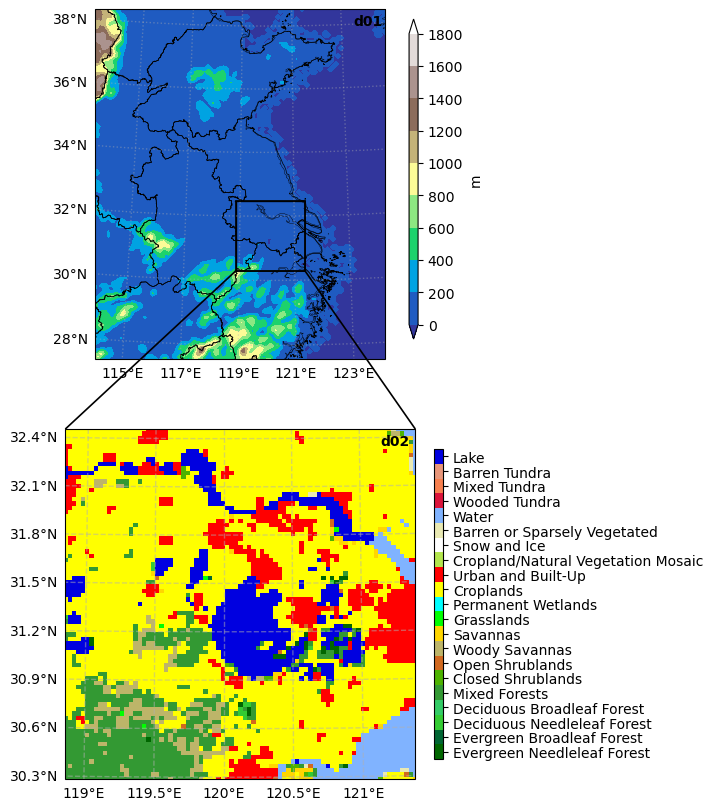

In [20]:
# # 测试
# 创建实例case1
case1 = Landuse_geo('../TestData/namelist.wps')
case1.d01_hgt('../TestData/geo_em.d01.nc')
case1.Landuse('../TestData/geo_em.d02.nc')